Предложете соодветна репрезентација и напишете ги потребните функции во Python за да се реши следниот проблем за кој една можна почетна состојба е прикажана на сликата Потребно е човечето безбедно да дојде до куќичката. Човечето може да се придвижува на кое било соседно поле хоризонтално или вертикално. Пречките 1 и 2 се подвижни, при што и двете пречки се движат вертикално. Секоја од пречките се придвижува за едно поле во соодветниот правец и насока со секое придвижување на човечето. Притоа, пречката 1 на почетокот се движи надолу, додека пречката 2 на почетокот се движи нагоре. Пример за положбата на пречките после едно придвижување на човечето надесно е прикажан на десната слика. Кога некоја пречка ќе дојде до крајот на таблата при што повеќе не може да се движи во насоката во која се движела, го менува движењето во спротивната насока. Доколку човечето и која било од пречките се најдат на исто поле човечето ќе биде уништено.

За сите тест примери изгледот и големината на таблата се исти како на примерот даден на сликите. За сите тест примери почетните положби, правец и насока на движење за препреките се исти. За секој тест пример почетната позиција на човечето се менува, а исто така се менува и позицијата на куќичката.

Во рамки на почетниот код даден за задачата се вчитуваат влезните аргументи за секој тест пример.

Движењата на човечето потребно е да ги именувате на следниот начин:

Right - за придвижување на човечето за едно поле надесно
Left - за придвижување на човечето за едно поле налево
Up - за придвижување на човечето за едно поле нагоре
Down - за придвижување на човечето за едно поле надолу

Вашиот код треба да има само еден повик на функција за приказ на стандарден излез (print) со кој ќе ја вратите секвенцата на движења која човечето треба да ја направи за да може од својата почетна позиција да стигне до позицијата на куќичката.

Треба да примените неинформирано пребарување. Врз основа на тест примерите треба самите да определите кое пребарување ќе го користите.


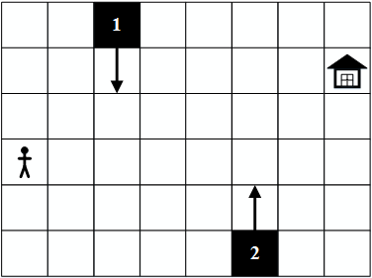

In [23]:
from IPython import display
display.Image('explorer1.png', width=300)

In [1]:
from collections import deque
import heapq

In [2]:
def limits(i,j):
    if 0 <= i <= 5 and 0 <= j <= 7:
        return True

In [3]:
def find_obstacle_1(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if matrix_state[i][j] == 2:
                return(i,j)
    return(0,0)

In [4]:
def find_obstacle_2(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if column == 3:
                return (i,j)
    return (0,0)

In [5]:
def find_person(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if column == 1:
                return (i,j)
    return (0,0)

In [6]:
def same_position(i_p,j_p,state):
    i_o1, j_o1 = find_obstacle_1(state)
    i_o2, j_o2 = find_obstacle_2(state)

    if (i_p == i_o1 and j_p == j_o1) or (i_p == i_o2 and j_p == j_o2):
        return False
    else:
        return True

In [7]:
def end_check(state): 
    state_matrix = [list(row) for row in state]
    i,j = find_person(state_matrix)
    if i == 1 and j == 7:
        return True

In [8]:
def expand_state(state):
    states = []
    new_state_matrix = [list(row) for row in state]

    moves_p = [(0,-1),(-1,0),(0,1),(1,0)]
    moves_o1 = [(1,0),(1,0),(1,0),(1,0)]
    moves_o2 = [(-1,0),(-1,0),(-1,0),(-1,0)]

    i_p,j_p = find_person(new_state_matrix)
    i_o1, j_o1 = find_obstacle_1(new_state_matrix)
    i_o2, j_o2 = find_obstacle_2(new_state_matrix)

    for (d_ip,d_jp),(d_io1,d_jo1),(d_io2,d_jo2) in zip(moves_p,moves_o1,moves_o2):
        new_state_matrix = [list(row) for row in state]
        new_ip = i_p + d_ip
        new_jp = j_p + d_jp

        new_io1 = i_o1 + d_io1
        new_jo1 = j_o1 + d_jo1

        new_io2 = i_o2 + d_io2
        new_jo2 = j_o2 + d_jo2

        if limits(new_ip,new_jp) and same_position(new_ip,new_jp,new_state_matrix):
            new_state_matrix[i_p][j_p] = 0
            new_state_matrix[new_ip][new_jp] = 1
        if limits(new_io1,new_jo1):
            new_state_matrix[i_o1][j_o1] = 0
            new_state_matrix[new_io1][new_jo1] = 2
        if limits(new_io2,new_jo2):
            new_state_matrix[i_o2][j_o2] = 0
            new_state_matrix[new_io2][new_jo2] = 3
       

        states.append(tuple(map(tuple,new_state_matrix)))

    return states

In [9]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if end_check(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [10]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        for row in new_state:
            print(' '.join(map(str, row)))
        
        print()

In [18]:
table = ((0,0,2,0,0,0,0,0),(0,1,0,0,0,0,0,4),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0),(0,0,0,0,0,3,0,0))
table1 = [list(row) for row in table]

In [13]:
a = search_path(table)
visualise_path(a)

0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 4
1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 4
0 0 2 0 0 0 0 0
0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 4
0 0 0 0 0 3 0 0
0 0 2 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0
0 0 1 0 0 3 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0
0 0 0 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 1 0 0 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 1 0 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 1 0 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 1 4
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0

0 0 0 0 0 3 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0
0 0 2 0 0 0 0 0



In [19]:
def a_star_search(starting_vertex, heuristic_function, alpha=1):
    expanded = set()
    queue = [((0, 0), [starting_vertex])]
    heapq.heapify(queue)
    c = 0
    while queue:
        c += 1
        weight_tuple, vertex_list = heapq.heappop(queue)
        current_a_star_weight, current_path_weight = weight_tuple
        vertex_to_expand = vertex_list[-1]
        if end_check(vertex_to_expand):
            return current_path_weight, vertex_list, c
        if vertex_to_expand in expanded:
            continue
        for neighbour in expand_state(vertex_to_expand):
            if neighbour not in expanded:
                heuristic = heuristic_function(neighbour)
                path_weight = current_path_weight + 1
                a_star_weight = path_weight + alpha * heuristic
                heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
        expanded.add(vertex_to_expand)

In [20]:
def manhattan_distance(state):
    matrix_explorer = [list(row) for row in state]
    i_p, j_p = find_person(matrix_explorer)
    return abs(i_p - 1) + abs(j_p - 7)


In [21]:
def h(state):
    distance = manhattan_distance(state)
    return distance

In [22]:
a_star_search(table,heuristic_function = manhattan_distance)

(8,
 [((0, 0, 2, 0, 0, 0, 0, 0),
   (0, 1, 0, 0, 0, 0, 0, 4),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 3, 0, 0)),
  ((0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 2, 0, 0, 0, 0, 4),
   (0, 1, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 3, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0)),
  ((0, 0, 0, 0, 0, 0, 0, 0),
   (0, 1, 0, 0, 0, 0, 0, 4),
   (0, 0, 2, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 3, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0)),
  ((0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 1, 0, 0, 0, 0, 4),
   (0, 0, 0, 0, 0, 3, 0, 0),
   (0, 0, 2, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0)),
  ((0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 1, 0, 3, 0, 4),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 2, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0)),
  ((0, 0, 0, 0, 0, 3, 0, 0),
   (0, 0, 0, 0, 1, 0, 0, 4),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0, 0, 0, 0, 0, 0, 0, 0),
   (0